In [84]:
# Import neccessary modules and access file + set vertical slice
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import metpy.calc as calc
from metpy.units import units
import pyart
from scipy.interpolate import interp2d
from sympy import symbols, diff

Data = Dataset("cm1out.nc")

Dataslice = 0

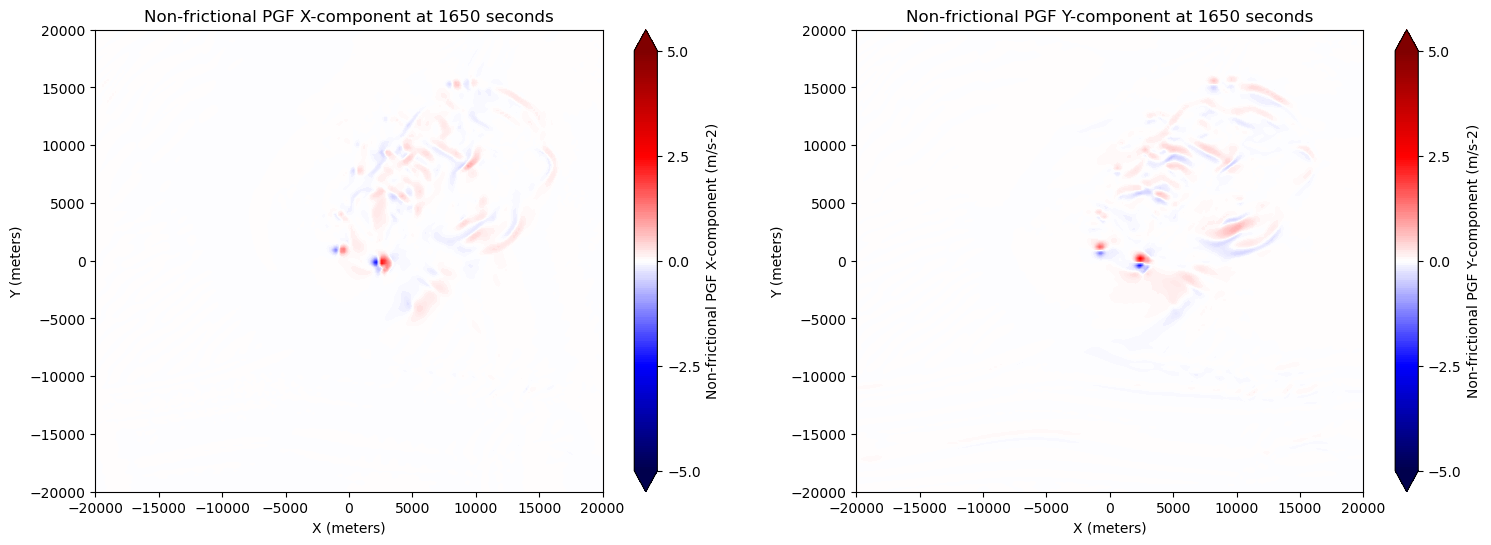

In [98]:
Time = 55

# Calculating PGF

# Access necessary variables
rho = Data['rho'][Time, Dataslice, :, :].data
pres = Data['prs'][Time, Dataslice, :, :].data
x = Data['xh'][:].data * 1000
y = Data['yh'][:].data * 1000

# Calculate dp/dx and PGF non-frictional formula
dpdx = np.gradient(pres, x, axis=1)
dpdy = np.gradient(pres, y, axis=0)
npgf_x = (1 / rho) * dpdx
npgf_y = (1 / rho) * dpdy

# Make a plot of the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot non-frictional PGF X-component (npgf_x)
contour_x = ax1.contourf(x, y, npgf_x, cmap='seismic', extend='both', levels=np.linspace(-5, 5, 201))
plt.colorbar(contour_x, ax=ax1, label='Non-frictional PGF X-component (m/s-2)', ticks=[-5, -2.5, 0, 2.5, 5])
ax1.set_xlabel('X (meters)')
ax1.set_ylabel('Y (meters)')
ax1.set_xlim([-20000, 20000])
ax1.set_ylim([-20000, 20000])
ax1.set_title(f'Non-frictional PGF X-component at {Time * 30} seconds')

# Plot non-frictional PGF Y-component (npgf_y)
contour_y = ax2.contourf(x, y, npgf_y, cmap='seismic', extend='both', levels=np.linspace(-5, 5, 201))
plt.colorbar(contour_y, ax=ax2, label='Non-frictional PGF Y-component (m/s-2)', ticks=[-5, -2.5, 0, 2.5, 5])
ax2.set_xlabel('X (meters)')
ax2.set_ylabel('Y (meters)')
ax2.set_xlim([-20000, 20000])
ax2.set_ylim([-20000, 20000])
ax2.set_title(f'Non-frictional PGF Y-component at {Time * 30} seconds')

plt.show()

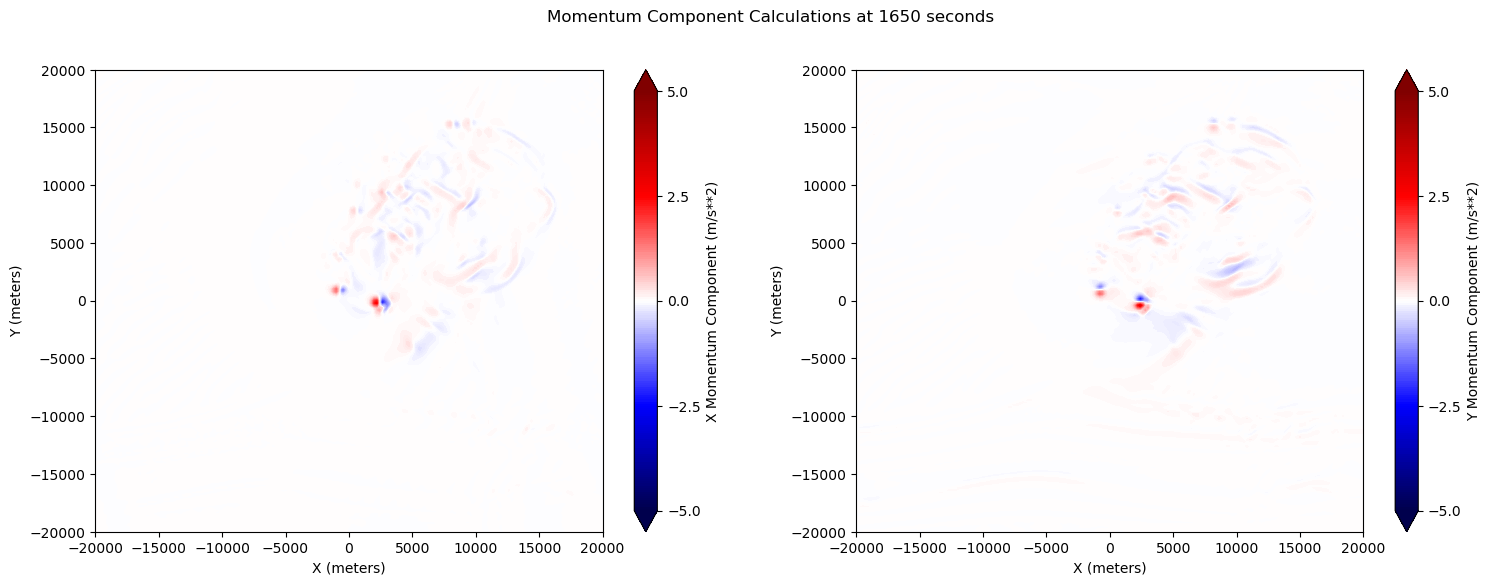

In [96]:
# Calculating momentum equations

Time = 55

# Access necessary variables
rho = Data['rho'][Time,Dataslice,:,:].data
pres = Data['prs'][Time,Dataslice,:,:].data
x = Data['xh'][:].data * 1000
y = Data['yh'][:].data * 1000

# Taking partial derivatives and making components
DpDx = np.gradient(pres, x, axis=1)
DpDy = np.gradient(pres, y, axis=0)
xcomp = -(1 / rho) * DpDx
ycomp = -(1 / rho) * DpDy

# Make a plot of the data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot X component
contour_x = ax1.contourf(x, y, xcomp, cmap='seismic', extend='both', levels=np.linspace(-5, 5, 201))
plt.colorbar(contour_x, ax=ax1, label='X Momentum Component (m/s**2)', ticks=[-5, -2.5, 0, 2.5, 5])
ax1.set_xlabel('X (meters)')
ax1.set_ylabel('Y (meters)')
ax1.set_xlim([-20000, 20000])
ax1.set_ylim([-20000, 20000])

# Plot Y component
contour_y = ax2.contourf(x, y, ycomp, cmap='seismic', extend='both', levels=np.linspace(-5, 5, 201))
plt.colorbar(contour_y, ax=ax2, label='Y Momentum Component (m/s**2)', ticks=[-5, -2.5, 0, 2.5, 5])
ax2.set_xlabel('X (meters)')
ax2.set_ylabel('Y (meters)')
ax2.set_xlim([-20000, 20000])
ax2.set_ylim([-20000, 20000])

plt.suptitle(f'Momentum Component Calculations at {Time * 30} seconds')
plt.show()